In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'C:/Users/aftab/Desktop/loan_defaulter_pred.csv'
loan_data = pd.read_csv(file)

In [3]:
loan_data.shape

(887379, 30)

In [4]:
loan_data = loan_data.iloc[:1001,:]

In [5]:
loan_data.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
id,1077501,1077430,1077175,1076863,1075358,1075269,1069639,1072053,1071795,1071570
year,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
issue_d,01/12/2011,01/12/2011,01/12/2011,01/12/2011,01/12/2011,01/12/2011,01/12/2011,01/12/2011,01/12/2011,01/12/2011
final_d,1012015,1042013,1062014,1012015,1012016,1012015,1012016,1012015,1042012,1112012
emp_length_int,10,0.5,10,10,1,3,8,9,4,0.5
home_ownership,RENT,RENT,RENT,RENT,RENT,RENT,RENT,RENT,OWN,RENT
home_ownership_cat,1,1,1,1,1,1,1,1,2,1
income_category,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
annual_inc,24000,30000,12252,49200,80000,36000,47004,48000,40000,15000
income_cat,1,1,1,1,1,1,1,1,1,1


In [6]:
loan_data['Defaulters'] = (loan_data['total_rec_prncp'] < loan_data['loan_amount'])

In [7]:
loan_data['Defaulters'] = loan_data['Defaulters'].replace({True:1,False:0})

In [8]:
data = loan_data.drop(columns = ['final_d','id','home_ownership','income_category','application_type','application_type_cat','interest_payments','loan_condition','grade','region','issue_d','purpose','term'])

In [9]:
data.head().transpose()

,0,1,2,3,4
year,2011.000000,2011.00,2011.000000,2011.00000,2011.00
emp_length_int,10.000000,0.50,10.000000,10.00000,1.00
home_ownership_cat,1.000000,1.00,1.000000,1.00000,1.00
annual_inc,24000.000000,30000.00,12252.000000,49200.00000,80000.00
income_cat,1.000000,1.00,1.000000,1.00000,1.00
loan_amount,5000.000000,2500.00,2400.000000,10000.00000,3000.00
term_cat,1.000000,2.00,1.000000,1.00000,2.00
purpose_cat,1.000000,2.00,3.000000,4.00000,4.00
interest_payment_cat,1.000000,2.00,2.000000,2.00000,1.00
loan_condition_cat,0.000000,1.00,0.000000,0.00000,0.00


In [10]:
data.dtypes

year                      int64
emp_length_int          float64
home_ownership_cat        int64
annual_inc                int64
income_cat                int64
loan_amount               int64
term_cat                  int64
purpose_cat               int64
interest_payment_cat      int64
loan_condition_cat        int64
interest_rate           float64
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
Defaulters                int64
dtype: object

c:\users\aftab\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\aftab\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\aftab\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\aftab\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


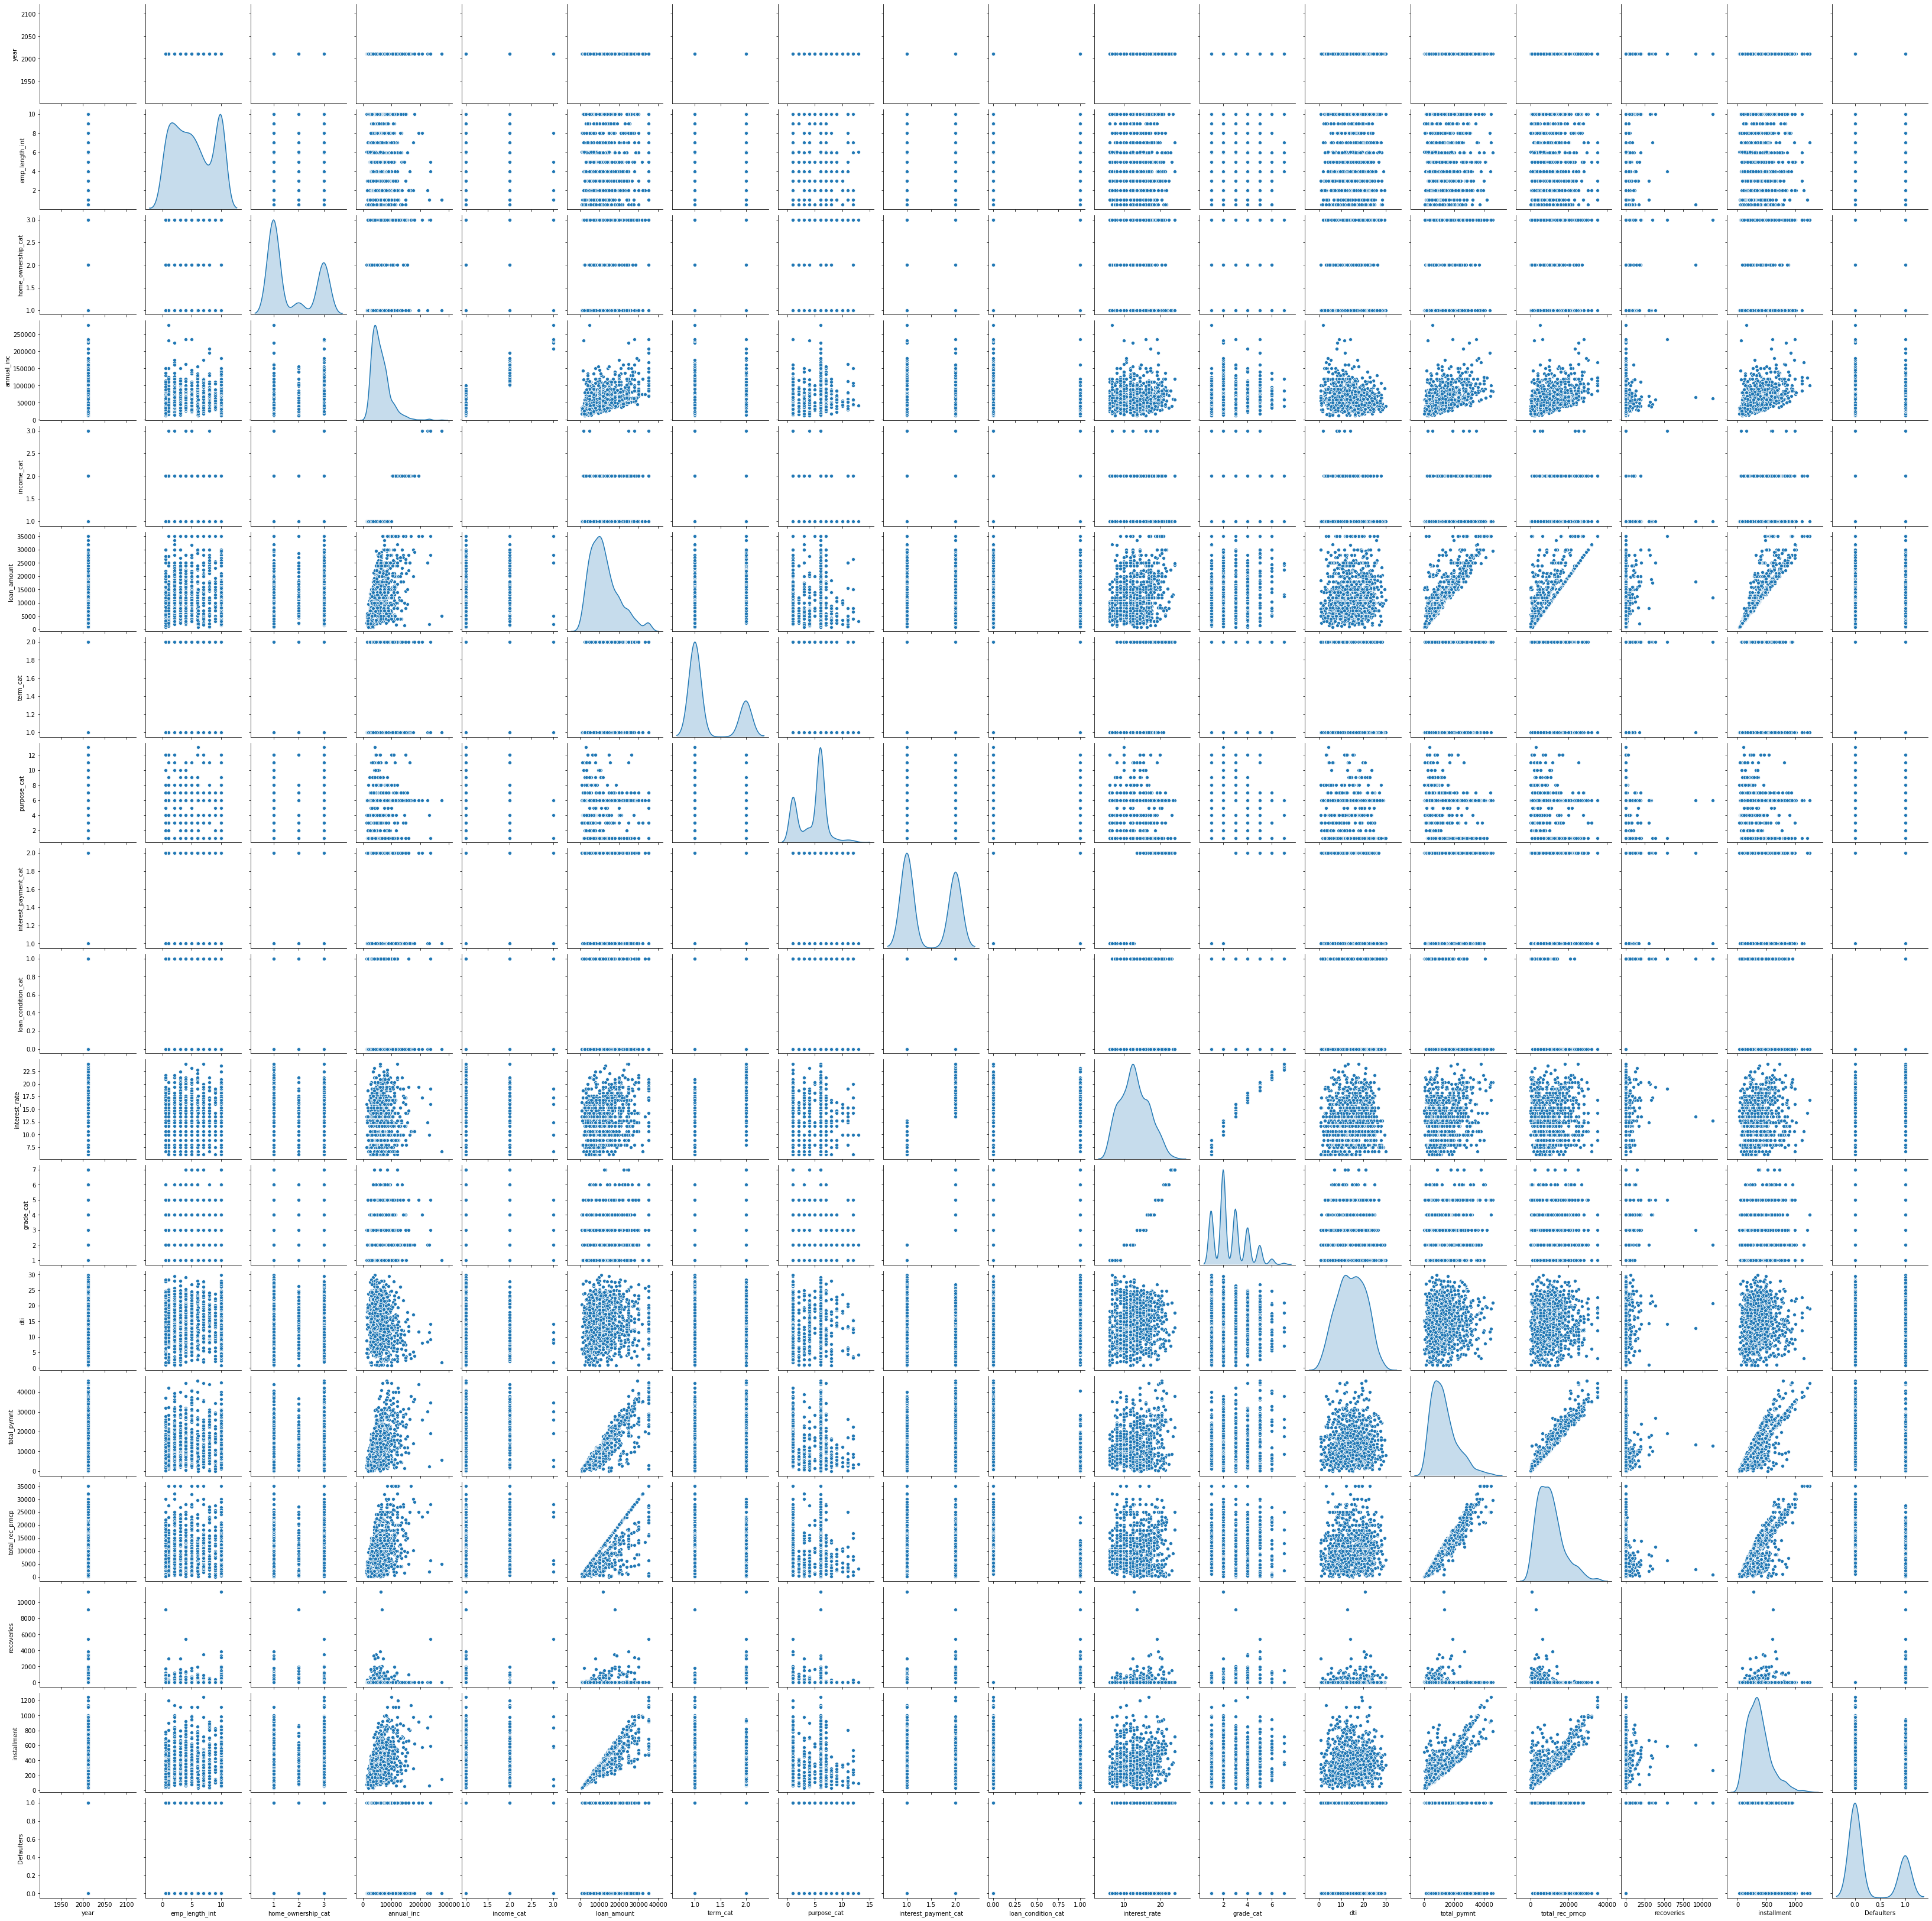

In [11]:
sns.pairplot(data.iloc[:,:18],diag_kind = 'kde')

In [12]:
data[data.isna().any(axis = 1)].count()

year                    0
emp_length_int          0
home_ownership_cat      0
annual_inc              0
income_cat              0
loan_amount             0
term_cat                0
purpose_cat             0
interest_payment_cat    0
loan_condition_cat      0
interest_rate           0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
Defaulters              0
dtype: int64

In [36]:
x = data.iloc[:,:17]
y = data['Defaulters']

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 100)

In [39]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy',random_state = 100,max_depth = 15)

In [40]:
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=100)

In [41]:
y_pred = model_entropy.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
score = accuracy_score(y_test,y_pred)
score

0.973421926910299

In [44]:
from sklearn.metrics import f1_score

In [46]:
f1_score(y_test,y_pred,average = None)

array([0.98156682, 0.95238095])